<a href="https://colab.research.google.com/github/Anshu6070/Time_series_analysis/blob/main/Talk_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time series analysis** \\
First we import all libraries use in time series forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns  

from statsmodels.tsa.seasonal import seasonal_decompose, STL

**Read dataset** \\
The "AirPassengers" dataset is a commonly used time series dataset that represents the monthly total number of international airline passengers, measured in thousands, from January 1949 to December 1960. It is often used as a sample dataset in time series analysis and forecasting tasks.

The dataset consists of two columns:

* **Month:** This column represents the date of each observation in a monthly 
format. The dates range from January 1949 to December 1960.

* **Passengers:** This column contains the corresponding number of international airline passengers for each month, measured in thousands.

In [2]:
data = pd.read_csv('/content/AirPassengers.csv')

In [3]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
data.columns = ['Month','Passengers']


In [5]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
data.head(10)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


**Dataset summary** \\
Here we describe Mean, Standard deviation, Min value , Max value and Quartiles 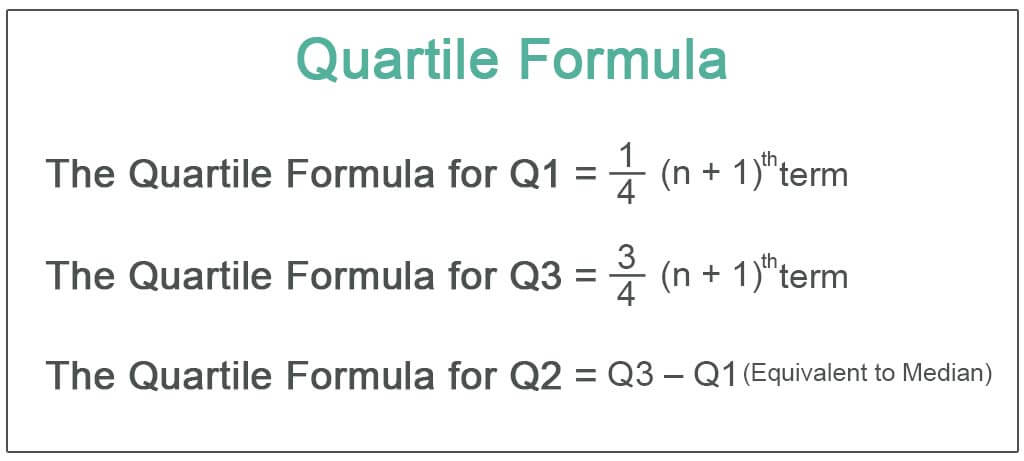 \\


In [7]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [8]:
data.mean()


<ipython-input-8-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Passengers    280.298611
dtype: float64

In [9]:
data.std()

<ipython-input-9-a47ac8255c06>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


Passengers    119.966317
dtype: float64

In [10]:
data.median()

<ipython-input-10-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


Passengers    265.5
dtype: float64

**Visualizations** \\
Histogram

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

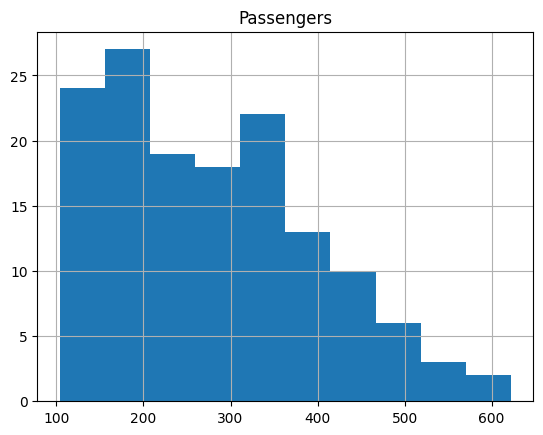

In [11]:
data.hist()

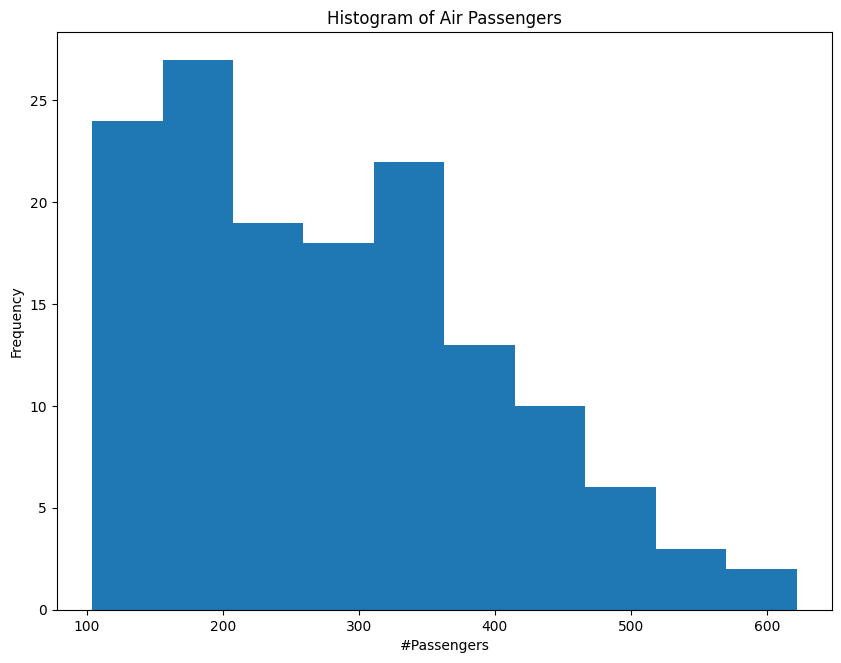

In [12]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure

plt.hist(data['Passengers'])
plt.title('Histogram of Air Passengers');
plt.xlabel('#Passengers');
plt.ylabel('Frequency');

**Distributional representations** \\
These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

<ipython-input-13-c4e9faaf534f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Passengers'], bins=20, hist=True, kde=True, color='#fcba03');


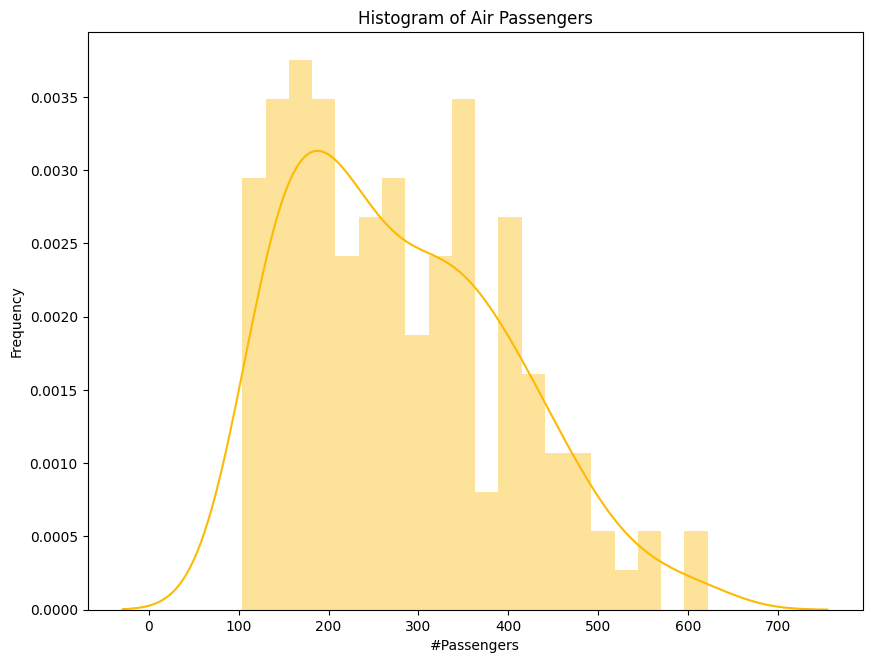

In [13]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure

sns.distplot(data['Passengers'], bins=20, hist=True, kde=True, color='#fcba03');
plt.title('Histogram of Air Passengers');
plt.xlabel('#Passengers');
plt.ylabel('Frequency');

**Scatter Plots**

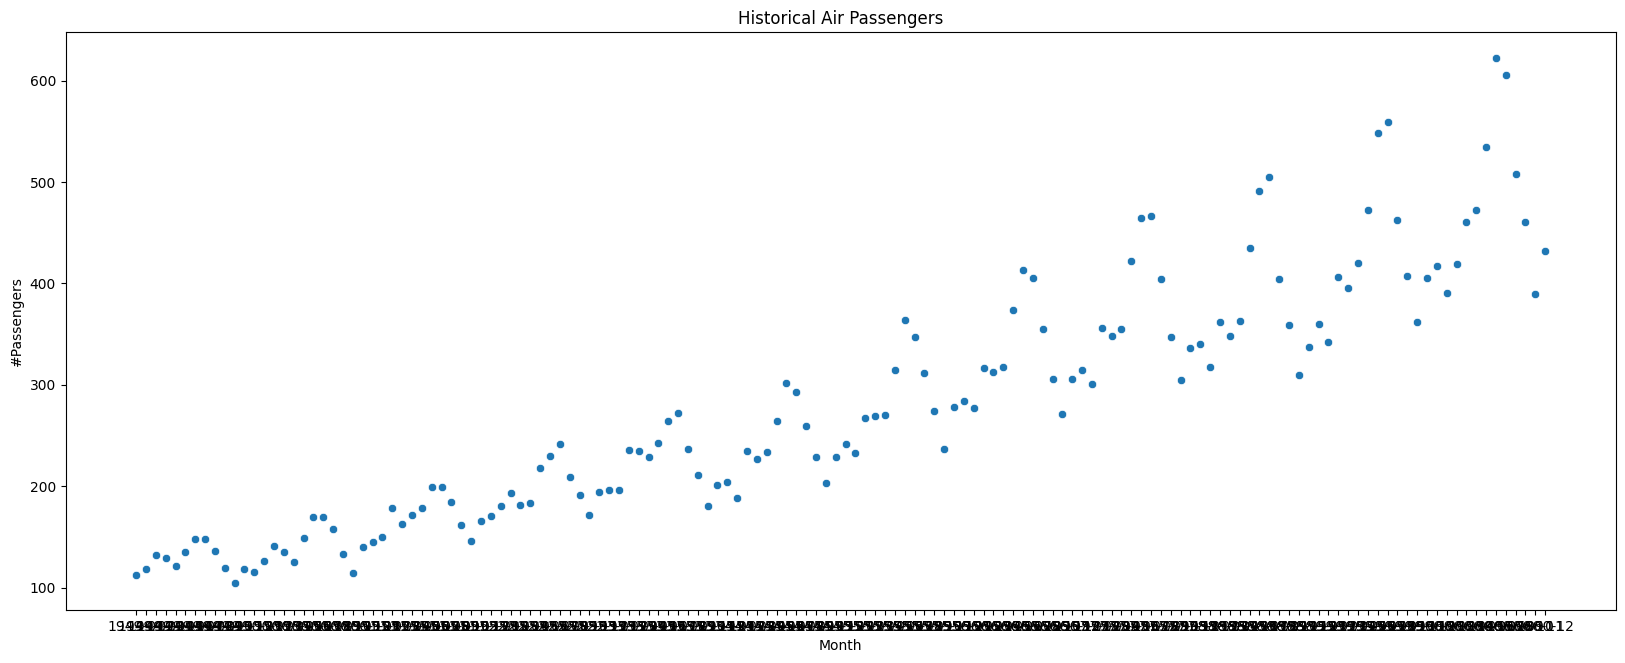

In [14]:
plt.figure(figsize=[20, 7.5]); # Set dimensions for figure

sns.scatterplot(x=data['Month'], y=data['Passengers']);
plt.title('Historical Air Passengers');
plt.ylabel('#Passengers');
plt.xlabel('Month');

**Visualize the Time Series**

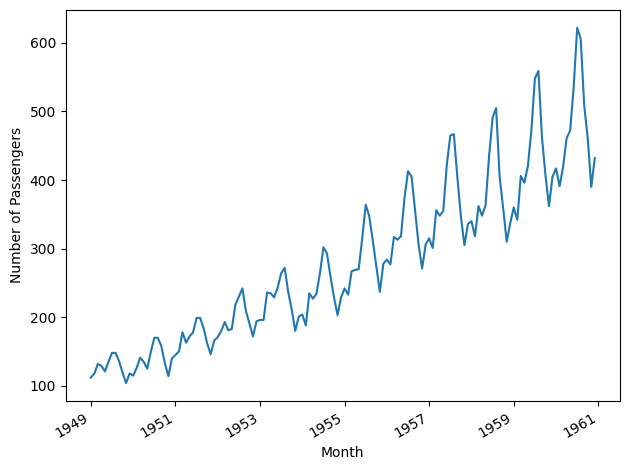

In [15]:
fig, ax = plt.subplots()

ax.plot(data.Month, data.Passengers)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')

plt.xticks(np.arange(0, 145, 24), [1949,1951,1953,1955,1957,1959,1961])

fig.autofmt_xdate()
plt.tight_layout()


In [16]:
advanced_decomposition = STL(data.Passengers, period=12).fit()

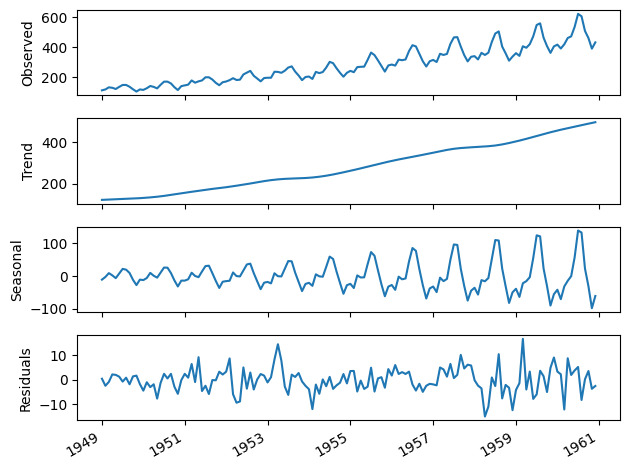

In [17]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(0, 145, 24), [1949,1951,1953,1955,1957,1959,1961])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH01_F02_peixeiro.png', dpi=300)

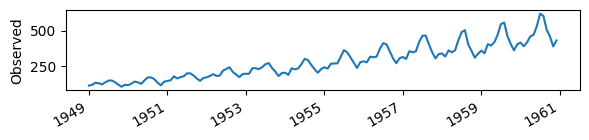

In [18]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.observed)
ax.set_ylabel('Observed')
plt.xticks(np.arange(0, 145, 24), [1949,1951,1953,1955,1957,1959,1961])
fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH01_F03_peixeiro.png', dpi=300)

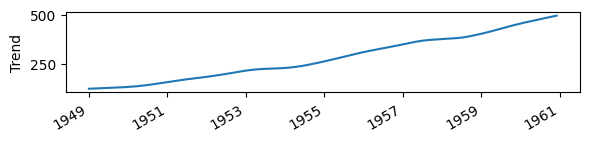

In [19]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.trend)
ax.set_ylabel('Trend')
plt.xticks(np.arange(0, 145, 24), [1949,1951,1953,1955,1957,1959,1961])

fig.autofmt_xdate()
plt.tight_layout()

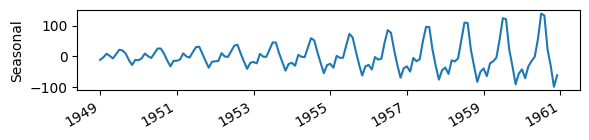

In [20]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.seasonal)
ax.set_ylabel('Seasonal')
plt.xticks(np.arange(0, 145, 24), [1949,1951,1953,1955,1957,1959,1961])
fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH01_F05_peixeiro.png', dpi=300)

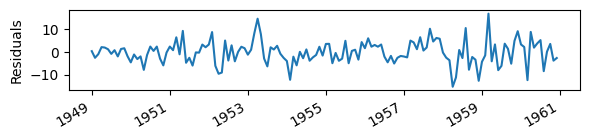

In [21]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.resid)
ax.set_ylabel('Residuals')
plt.xticks(np.arange(0, 145, 24), [1949,1951,1953,1955,1957,1959,1961])

fig.autofmt_xdate()
plt.tight_layout()


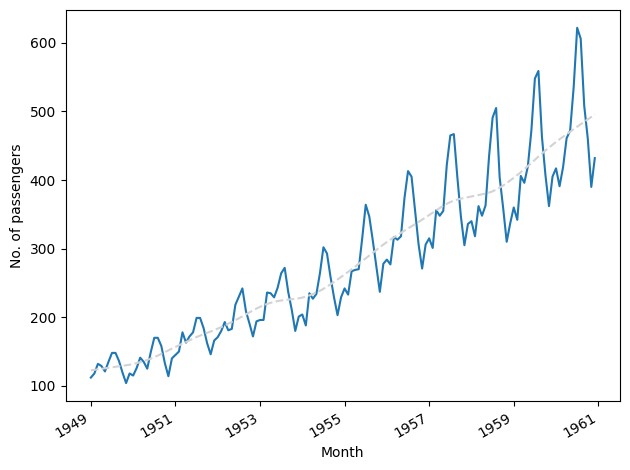

In [22]:
fig, ax = plt.subplots()

ax.plot(data.Month, data.Passengers)
ax.plot(advanced_decomposition.trend, color='lightgrey', linestyle='--', label='Trend')
ax.set_xlabel('Month')
ax.set_ylabel('No. of passengers')

plt.xticks(np.arange(0, 145, 24), [1949,1951,1953,1955,1957,1959,1961])


fig.autofmt_xdate()
plt.tight_layout()

**Plot data with train/test split** \\
*The forecasting period is illustrated by the gray zone.*

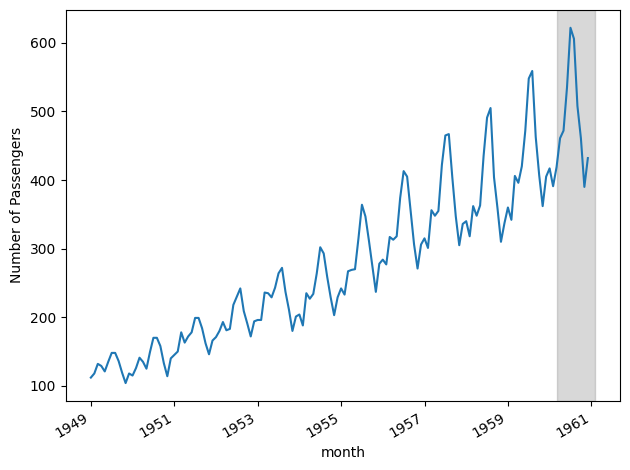

In [23]:
fig, ax = plt.subplots()

ax.plot(data['Month'], data['Passengers'])
ax.set_xlabel('month')
ax.set_ylabel('Number of Passengers')
ax.axvspan(134, 145, color='#808080', alpha=0.3)
plt.xticks(np.arange(0, 145, 24), [1949,1951,1953,1955,1957,1959,1961])
#plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [24]:
train = data[:-12]
test = data[-12:]

**We will discuss four different baseline modle**


*   Implementing the historical mean baseline
*   Forecasting last year’s mean

*   Predicting using the last known value
*   Implementing the naive seasonal forecast 





**Implementing the historical mean baseline**

*   Compute the arithmetic mean of the data column in the train set.


*   This gives a
value of 262.49242424242425. This means that from 1949 to the end of 1959, the montly Number of passengers  is on average 262.49242424242425.




In [25]:
historical_mean = np.mean(train['Passengers'])
historical_mean

262.49242424242425

Now we will naively forecast this value for each quarter of 1960. To do so, we’ll simply create a new column, pred_mean, that holds the historical mean of the training
set as a forecast:

In [26]:
test.loc[:, 'pred_mean'] = historical_mean

test

<ipython-input-26-335dd48d1b92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = historical_mean


,Month,Passengers,pred_mean
132,1960-01,417,262.492424
133,1960-02,391,262.492424
134,1960-03,419,262.492424
135,1960-04,461,262.492424
136,1960-05,472,262.492424
137,1960-06,535,262.492424
138,1960-07,622,262.492424
139,1960-08,606,262.492424
140,1960-09,508,262.492424
141,1960-10,461,262.492424


Next, we need to define and calculate an error metric in order to evaluate the performance of our forecasts on the test set. \\
**we will use the mean absolute percentage error (MAPE)**




In [27]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
mape_hist_mean = mape(test['Passengers'], test['pred_mean'])
mape_hist_mean

43.62152220711003

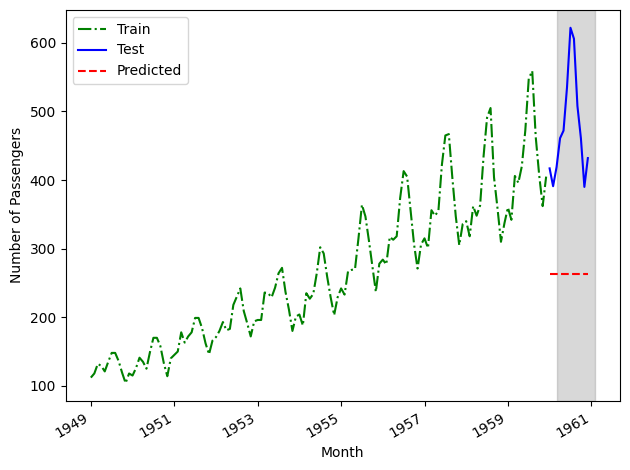

In [29]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Passengers'], 'g-.', label='Train')
ax.plot(test['Month'], test['Passengers'], 'b-', label='Test')
ax.plot(test['Month'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.axvspan(134, 145, color='#808080', alpha=0.3)
ax.legend(loc=2)

plt.xticks(np.arange(0, 145, 24), [1949,1951,1953,1955,1957,1959,1961])


fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F06_peixeiro.png', dpi=300)

**Forecasting last year’s mean**

In [30]:
last_year_mean = np.mean(train['Passengers'][-12:])
last_year_mean

428.3333333333333

In [31]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

test

<ipython-input-31-5532e2ab05ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred__last_yr_mean'] = last_year_mean


,Month,Passengers,pred_mean,pred__last_yr_mean
132,1960-01,417,262.492424,428.333333
133,1960-02,391,262.492424,428.333333
134,1960-03,419,262.492424,428.333333
135,1960-04,461,262.492424,428.333333
136,1960-05,472,262.492424,428.333333
137,1960-06,535,262.492424,428.333333
138,1960-07,622,262.492424,428.333333
139,1960-08,606,262.492424,428.333333
140,1960-09,508,262.492424,428.333333
141,1960-10,461,262.492424,428.333333


In [32]:
mape_last_year_mean = mape(test['Passengers'], test['pred__last_yr_mean'])
mape_last_year_mean

12.055750606375332

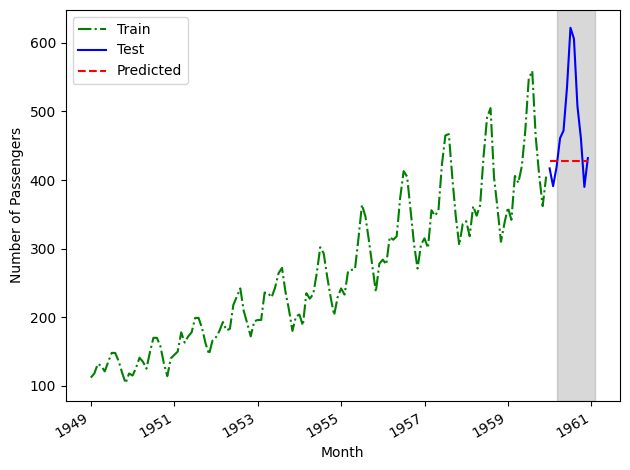

In [33]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Passengers'], 'g-.', label='Train')
ax.plot(test['Month'], test['Passengers'], 'b-', label='Test')
ax.plot(test['Month'], test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.axvspan(134, 145, color='#808080', alpha=0.3)
ax.legend(loc=2)

plt.xticks(np.arange(0, 145, 24), [1949,1951,1953,1955,1957,1959,1961])


fig.autofmt_xdate()
plt.tight_layout()

**Predicting using the last known value**

In [34]:
last = train['Passengers'].iloc[-1]
last

405

In [35]:
test.loc[:, 'pred_last'] = last

test

<ipython-input-35-3a426c9dce84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last


,Month,Passengers,pred_mean,pred__last_yr_mean,pred_last
132,1960-01,417,262.492424,428.333333,405
133,1960-02,391,262.492424,428.333333,405
134,1960-03,419,262.492424,428.333333,405
135,1960-04,461,262.492424,428.333333,405
136,1960-05,472,262.492424,428.333333,405
137,1960-06,535,262.492424,428.333333,405
138,1960-07,622,262.492424,428.333333,405
139,1960-08,606,262.492424,428.333333,405
140,1960-09,508,262.492424,428.333333,405
141,1960-10,461,262.492424,428.333333,405


In [36]:
mape_last = mape(test['Passengers'], test['pred_last'])
mape_last

14.251338486772209

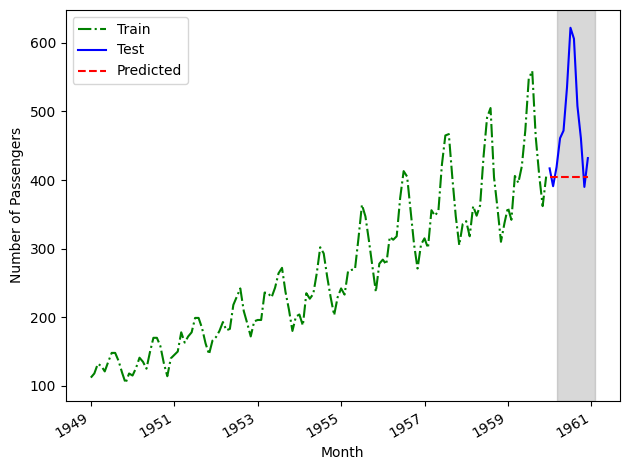

In [37]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Passengers'], 'g-.', label='Train')
ax.plot(test['Month'], test['Passengers'], 'b-', label='Test')
ax.plot(test['Month'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.axvspan(134, 145, color='#808080', alpha=0.3)
ax.legend(loc=2)

plt.xticks(np.arange(0, 145, 24), [1949,1951,1953,1955,1957,1959,1961])


fig.autofmt_xdate()
plt.tight_layout()

**Implementing the naive seasonal forecast**

In [38]:
test.loc[:, 'pred_last_season'] = train['Passengers'][-12:].values

test

<ipython-input-38-31ea637c274d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_season'] = train['Passengers'][-12:].values


,Month,Passengers,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
132,1960-01,417,262.492424,428.333333,405,360
133,1960-02,391,262.492424,428.333333,405,342
134,1960-03,419,262.492424,428.333333,405,406
135,1960-04,461,262.492424,428.333333,405,396
136,1960-05,472,262.492424,428.333333,405,420
137,1960-06,535,262.492424,428.333333,405,472
138,1960-07,622,262.492424,428.333333,405,548
139,1960-08,606,262.492424,428.333333,405,559
140,1960-09,508,262.492424,428.333333,405,463
141,1960-10,461,262.492424,428.333333,405,407


In [39]:
mape_naive_seasonal = mape(test['Passengers'], test['pred_last_season'])
mape_naive_seasonal

9.987532920823485

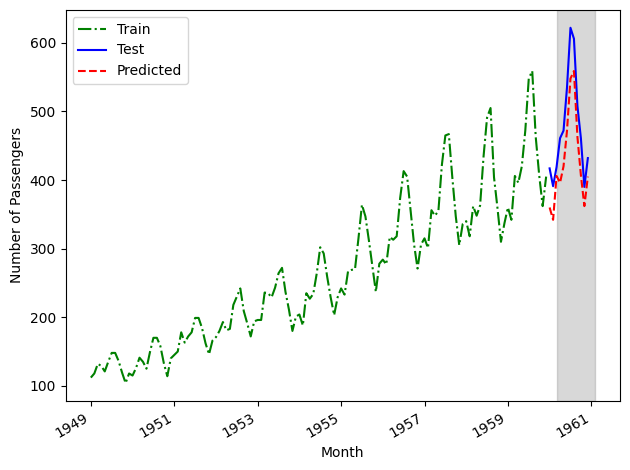

In [40]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Passengers'], 'g-.', label='Train')
ax.plot(test['Month'], test['Passengers'], 'b-', label='Test')
ax.plot(test['Month'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.axvspan(134, 145, color='#808080', alpha=0.3)
ax.legend(loc=2)

plt.xticks(np.arange(0, 145, 24), [1949,1951,1953,1955,1957,1959,1961])


fig.autofmt_xdate()
plt.tight_layout()

**As you can see, the baseline using the naive seasonal forecast has the lowest 
MAPE, and therefore the best performance.**

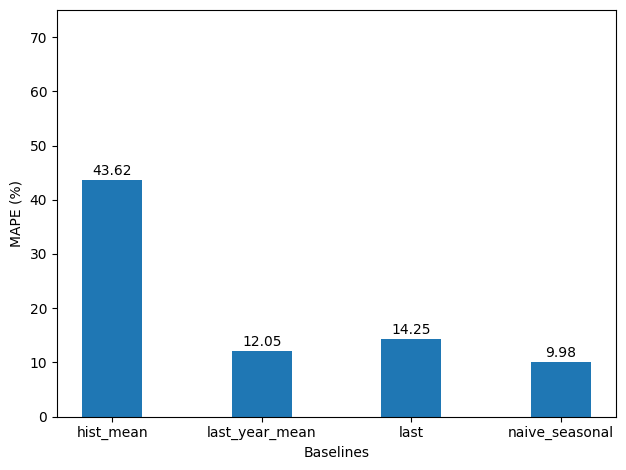

In [41]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [43.62, 12.05, 14.25, 9.98]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()